In [1]:
import pickle, os
import numpy as np, matplotlib.pyplot as plt

In [2]:
filename = 'first_tests.pickle'
filename2 = 'first_tests_smaller_training_sets.pickle'
filenameS2 = 'S2CNN_first_tests_smaller_training_sets.pickle'

with open(filename, 'rb') as file:
    loaded = pickle.load(file)
    
with open(filename2, 'rb') as file:
    loaded2 = pickle.load(file)
    
with open(filenameS2, 'rb') as file:
    loadedS2 = pickle.load(file)
    
data = np.array(loaded[0][0]) # too many copies of the same data were saved, pick only one
data2 = np.array(loaded2).reshape(45,2)
dataS2 = np.array(loadedS2).reshape(15,2)

In [3]:
test_acc2 = np.zeros(45)
for i in range(45):
    test_acc2[i] = data2[i][0]['test_acc']
    
test_acc2 = test_acc2.reshape(3,5,3)

In [4]:
test_acc1 = np.zeros(54)
for i in range(54):
    test_acc1[i] = data[i][0]['test_acc']
    
test_acc1 = test_acc1.reshape(3,6,3)

In [5]:
test_accS2 = np.zeros(15)
for i in range(15):
    test_accS2[i] = dataS2[i][0]['test_acc']
    
test_accS2 = test_accS2.reshape(5,3)

In [6]:
test_acc = np.append(test_acc2, test_acc1, axis=1)

In [7]:
best_test_acc = np.amax(test_acc, axis=2)
best_test_accS2 = np.amax(test_accS2, axis=1)
train_samples = [10, 20, 30, 40, 50, 60, 80, 100, 120, 240, 600]

Note that the maximum number of training epochs was 20, instead of 100, as in the original plot.

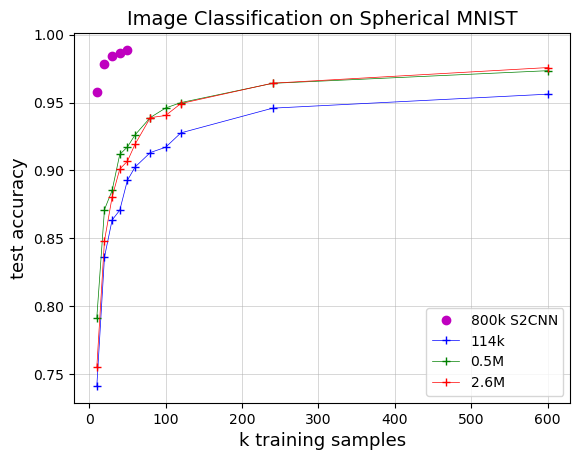

In [8]:
fontsize = 13

plt.title('Image Classification on Spherical MNIST', fontsize=14)
plt.plot(train_samples[:5], best_test_accS2, 'o', color='m', label='800k S2CNN', linewidth='0.5')
for i, (color, label) in enumerate(zip(['b','g','r'], ['114k', '0.5M', '2.6M'])):
    plt.plot(train_samples, best_test_acc[i], '+-', color=color, label=label, linewidth='0.5')
plt.grid(alpha=0.7, linewidth=0.5)
plt.legend()
plt.xlabel('k training samples', fontsize=fontsize)
plt.ylabel('test accuracy', fontsize=fontsize)
plt.show()

In [11]:
best_test_accS2[1]

0.978600025177002

In [12]:
best_test_acc[2,-1]

0.9757999777793884

In [14]:
dataS2[1]

array([{'test_loss': 0.18031542003154755, 'test_acc': 0.948199987411499},
       {'name': '800k', 'train_batch_size': 32, 'test_batch_size': 32, 'num_workers': 0, 'lr': 0.0001, 'weight_decay': 0.0, 'channels': [8, 16, 16, 24, 24, 32, 64], 'bandlimit': [30, 15, 15, 8, 8, 4, 2], 'kernel_max_beta': [0.0625, 0.0625, 0.0625, 0.125, 0.125, 0.25, 0.25, 0.59], 'activation_fn': 'ReLU', 'batch_norm': True, 'nodes': [64, 32]}],
      dtype=object)

In [17]:
np.array(loaded2)[0,0]

(3, 5, 3, 2)

Investigate test_loss